In [2]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable
from dataclasses import dataclass
plt.rcParams.update({'font.size': 12})

In [7]:
# channel_length = 100 #nm
# contact_length = 10 #nm

channel_length = 19.596 #nm 46 unit cells
contact_length = 5.112 #nm 12 unit cells

total_length = channel_length + 2* contact_length

acc = 0.142
print('CNT bond length (nm):', acc)
unit_cell_length = 3*acc
print('unit_cell_length:' , unit_cell_length)

N_unitcells = int(total_length/unit_cell_length)

if(N_unitcells%2 != 0):
    N_unitcells -= 1

print('N_unitcells', N_unitcells)

CNT bond length (nm): 0.142
unit_cell_length: 0.42599999999999993
N_unitcells 70


In [9]:
#semiconducting zigzag nanotube with m,n notation
m=17 
n=0 
#(m-n)/3 % 3 ne 0 => cnt is semiconducting
#N_unitcells = 44
#N_unitcells=2
cnt_type = 'zigzag'

atoms_per_ring = m
nring_per_unitcell = 4
N_rings = N_unitcells*nring_per_unitcell
total_atoms = N_rings*m
atoms_per_unitcell = nring_per_unitcell*atoms_per_ring

print('Total number of unitcells in a CNT:',N_unitcells)
print('CNT type:',cnt_type, ', (m,n): (', m,',',n,')' )
print('number of rings per unitcell:', nring_per_unitcell)
print('Total number of rings:', N_rings)
print('Number of atoms per ring:', atoms_per_ring)
print('Number of atoms per unitcell:', atoms_per_unitcell)
print('Total number of atoms in cnt: ', total_atoms)



R_cnt = acc*(np.sqrt(3.)/(2*np.pi))*np.sqrt(m**2 + m*n + n**2)
print('Radius of CNT (nm):',R_cnt)

nano=1e-9

total_length = unit_cell_length*N_unitcells
print('total_lenght', total_length)
 


X_OFFSET = 0.
Y_OFFSET = 0.
Z_OFFSET = 0.
print('final offset from (0, 0, 0): ', X_OFFSET, Y_OFFSET, Z_OFFSET)

Total number of unitcells in a CNT: 70
CNT type: zigzag , (m,n): ( 17 , 0 )
number of rings per unitcell: 4
Total number of rings: 280
Number of atoms per ring: 17
Number of atoms per unitcell: 68
Total number of atoms in cnt:  4760
Radius of CNT (nm): 0.665453976774103
total_lenght 29.819999999999997
final offset from (0, 0, 0):  0.0 0.0 0.0


In [10]:
#Nring_arr = np.arange(0,N_rings)
cnt_ring_pos = np.zeros(N_rings)

In [11]:
def get_atom_pos(r, c, n, ACC,R):
    y=0.
    x=0.
    z=0.
    theta=0.

    if(r % 2 == 0):
        y = ACC
    elif (r%2 == 1):
        y = ACC/2
    if(r%4 == 0 or r%4==3):
        theta = (c/(n))*2*np.pi
    else:
        theta = (c/n)*2*np.pi + (np.sqrt(3.)/2.)*ACC/R

    z = R*np.cos(theta)
    x = R*np.sin(theta)
    return (x,y,z,theta)

@dataclass
class atom_pos:
    id: int = -1
    x: float = 0.
    y: float = 0.
    z: float = 0.
    theta: float =0. 

def translate(atom_list, offset_arr):
    RINGS = np.shape(atom_list)[0]
    ATOMS_PER_RING = np.shape(atom_list)[1]
    for r in range(0,RINGS):
        for c in range(0,ATOMS_PER_RING):
            atom_list[r][c].x += offset_arr[0]
            atom_list[r][c].y += offset_arr[1]
            atom_list[r][c].z += offset_arr[2]   

In [12]:
     
atoms = []
counter = 0
cnt_ring_pos[0] = acc
for r in range(0,N_rings):
    my_list=[]
    for c in range(0,atoms_per_ring):
        X, axial_offset, Z, Theta = get_atom_pos(r,c,atoms_per_ring, acc,R_cnt)
        if(r > 0):
            cnt_ring_pos[r] = cnt_ring_pos[r-1] + axial_offset
        Y = cnt_ring_pos[r]
        my_list.append(atom_pos(id=counter,x=X,y=Y,z=Z,theta=Theta))
        counter = counter + 1 
    atoms.append(my_list)
        
# for r in range(0,1):
#     for c in range(0,atoms_per_ring):
#         print(atoms[r][c].id,atoms[r][c].x,atoms[r][c].y,atoms[r][c].z )
        

In [13]:
connectivity = {0: (33,17), 
                1: (17, 18),
                2: (18, 19), 
                3: (19, 20), 
                4: (20, 21),
                5: (21, 22), 
                6: (22, 23),
                7: (23, 24), 
                8: (24, 25), 
                9: (25, 26),
                10: (26, 27),
                11: (27, 28), 
                12: (28, 29),
                13: (29, 30), 
                14: (30, 31),
                15: (31, 32), 
                16: (32, 33),
                17: (34,), 
                18: (35,),
                19: (36,), 
                20: (37,), 
                21: (38,),
                22: (39,), 
                23: (40,),
                24: (41,), 
                25: (42,), 
                26: (43,),
                27: (44,),
                28: (45,), 
                29: (46,),
                30: (47,), 
                31: (48,),
                32: (49,), 
                33: (50,),
                 34: (51,52), 
                 35: (52,53),
                 36: (53, 54), 
                37: (54, 55), 
                38: (55, 56),
                39: (56, 57), 
                40: (57, 58),
                41: (58, 59), 
                42: (59, 60), 
                43: (60, 61),
                44: (61, 62),
                45: (62, 63), 
                46: (63, 64),
                47: (64, 65), 
                48: (65, 66),
                49: (66, 67), 
                50: (67, 51),
                51: (68,), 
                52: (69,),
                53: (70,), 
                54: (71,), 
                55: (72,),
                56: (73,), 
                57: (74,),
                58: (75,), 
                59: (76,), 
                60: (77,),
                61: (78,),
                62: (79,), 
                63: (80,),
                64: (81,), 
                65: (82,),
                66: (83,), 
                67: (84,),
                }

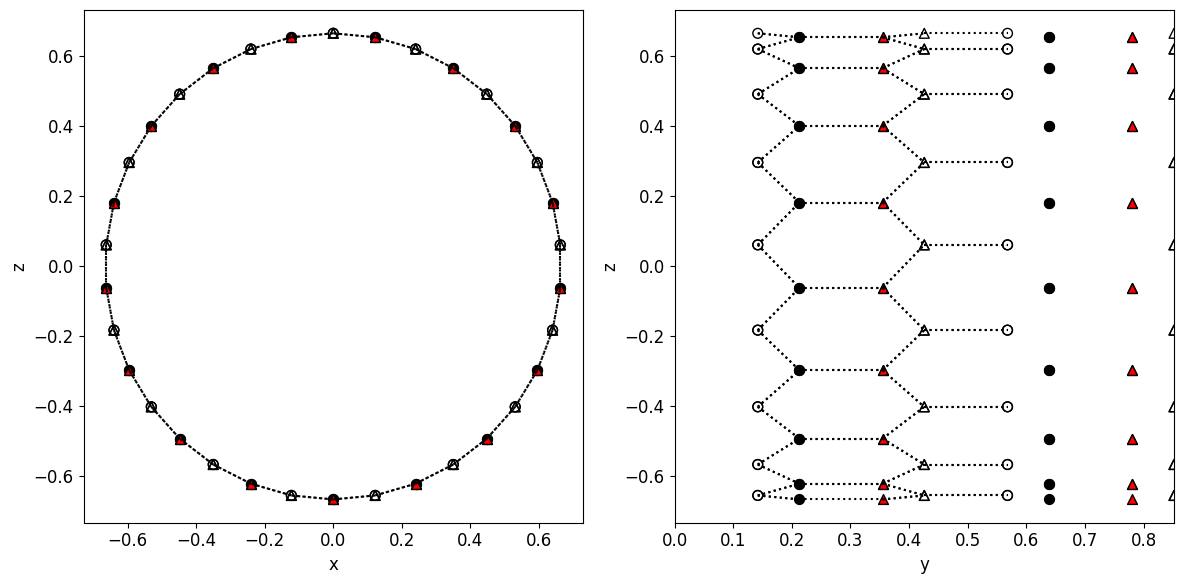

In [14]:
fig, ax = plt.subplots(figsize=(12, 6), ncols=2)
coords_yz=[]
coords_xz=[]

for r in range(0,2*nring_per_unitcell):
    for c in range(0,atoms_per_ring):
        facecolor = 'none'
        if(r %4 == 0 or r%4 == 1):
            marker = 'o'
            markersize=50
            if(r%4==1):
                facecolor ='k'
        if(r%4 == 2 or r%4 == 3):
            marker = '^' 
            markersize=50
            if(r%4 == 2):
                facecolor ='r'
        coords_yz.append((atoms[r][c].y,atoms[r][c].z)) 
        coords_xz.append((atoms[r][c].x,atoms[r][c].z)) 

#        if(atoms[r][c].theta < 2*np.pi):
        ax[0].scatter(atoms[r][c].x,atoms[r][c].z,marker=marker,
                    s=markersize,color='k',facecolors=facecolor)
#        if(atoms[r][c].x < 0):
        ax[1].scatter(atoms[r][c].y,atoms[r][c].z,marker=marker,s=markersize, color='k',facecolors=facecolor)
            

for k, v in connectivity.items():
    for i in v: 
        y, z = zip(coords_yz[k], coords_yz[i])
        ax[1].plot(y, z, 'k:')

for k, v in connectivity.items():
    for i in v:
        x,z = zip(coords_xz[k], coords_xz[i])
        ax[0].plot(x, z, 'k:')  
        
#ax[0].set_ylim(0.6,0.7)
        
ax[0].set_xlabel("x")
ax[0].set_ylabel("z")
ax[1].set_xlabel("y")
ax[1].set_xlim(0,2*unit_cell_length)
ax[1].set_ylabel("z")
fig.tight_layout()

plt.savefig('cnt2d_zigzag_%d_%d.png'%(m,n), bbox_inches='tight',transparent=False)

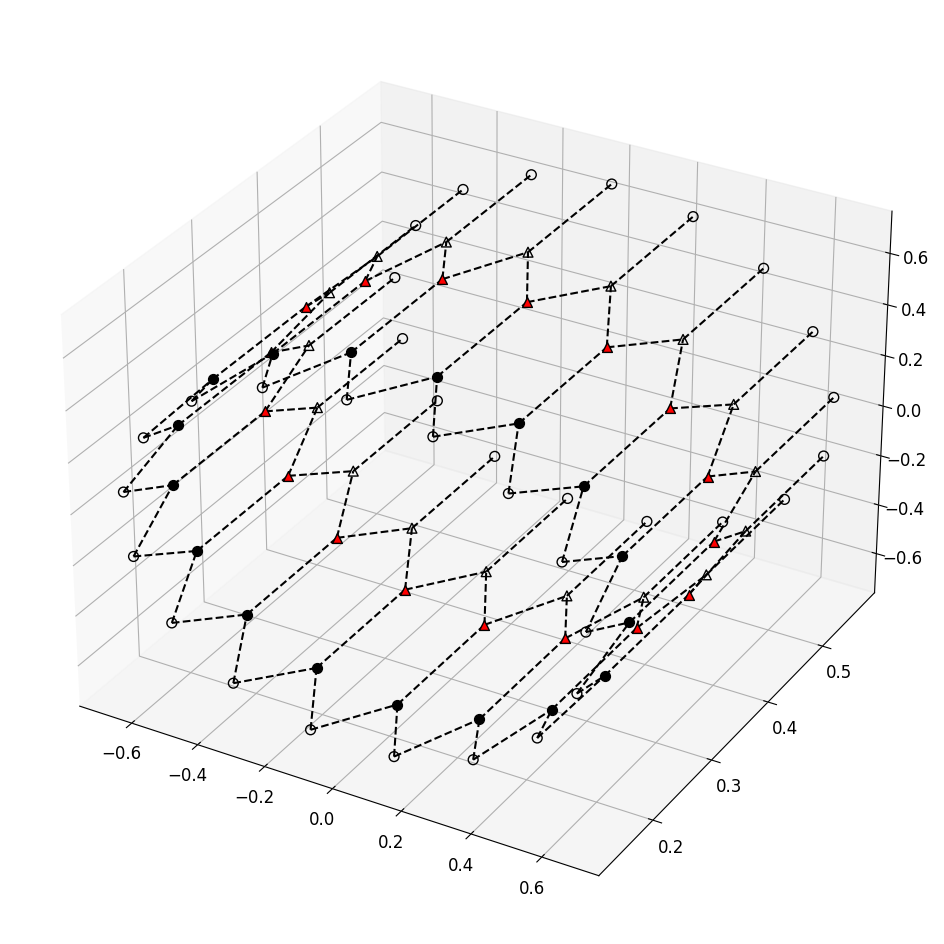

In [15]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')

coords_xyz = []
for r in range(0,5):
    for c in range(0,atoms_per_ring):
        facecolor = 'none'
        if(r %4 == 0 or r%4 == 1):
            marker = 'o'
            markersize=50
            if(r%4==1):
                facecolor ='k'
        if(r%4 == 2 or r%4 == 3):
            marker = '^' 
            markersize=50
            if(r%4 == 2):
                facecolor ='r'
        coords_xyz.append((atoms[r][c].x,atoms[r][c].y,atoms[r][c].z)) 

        ax.scatter(atoms[r][c].x, atoms[r][c].y, atoms[r][c].z,marker=marker,s=markersize, color='k',facecolors=facecolor)
        
for k, v in connectivity.items():
    for i in v:
        x, y, z = zip(coords_xyz[k], coords_xyz[i])
        ax.plot(x, y, z, 'k--')
#ax.set_ylim(0,0.5)
plt.savefig('cnt3d_zigzag_%d_%d.png'%(m,n), bbox_inches='tight',transparent=False)
        

In [16]:
offset = np.array([X_OFFSET,Y_OFFSET,Z_OFFSET])
translate(atoms,offset)

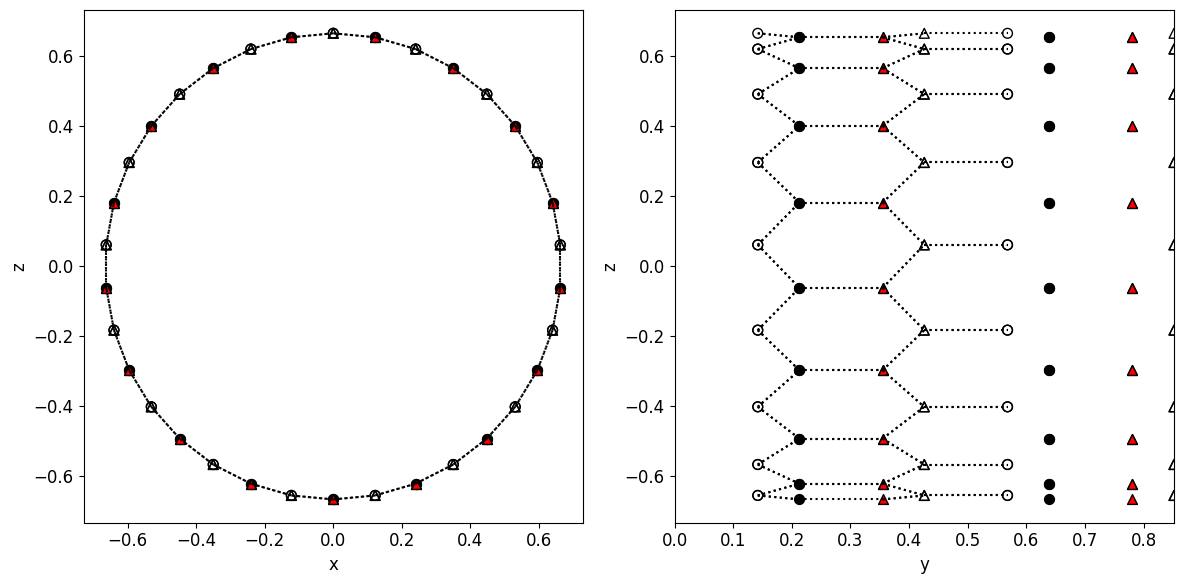

In [18]:
fig, ax = plt.subplots(figsize=(12, 6), ncols=2)
coords_yz=[]
coords_xz=[]

for r in range(0,2*nring_per_unitcell):
    for c in range(0,atoms_per_ring):
        facecolor = 'none'
        if(r %4 == 0 or r%4 == 1):
            marker = 'o'
            markersize=50
            if(r%4==1):
                facecolor ='k'
        if(r%4 == 2 or r%4 == 3):
            marker = '^' 
            markersize=50
            if(r%4 == 2):
                facecolor ='r'
        coords_yz.append((atoms[r][c].y,atoms[r][c].z)) 
        coords_xz.append((atoms[r][c].x,atoms[r][c].z)) 

#        if(atoms[r][c].theta < 2*np.pi):
        ax[0].scatter(atoms[r][c].x,atoms[r][c].z,marker=marker,
                    s=markersize,color='k',facecolors=facecolor)
#        if(atoms[r][c].x < 0):
        ax[1].scatter(atoms[r][c].y,atoms[r][c].z,marker=marker,s=markersize, color='k',facecolors=facecolor)
            

for k, v in connectivity.items():
    for i in v: 
        y, z = zip(coords_yz[k], coords_yz[i])
        ax[1].plot(y, z, 'k:')

for k, v in connectivity.items():
    for i in v:
        x,z = zip(coords_xz[k], coords_xz[i])
        ax[0].plot(x, z, 'k:')  
        
#ax[0].set_ylim(0.6,0.7)
        
ax[0].set_xlabel("x")
ax[0].set_ylabel("z")
ax[1].set_xlabel("y")
ax[1].set_xlim(Y_OFFSET,Y_OFFSET+2*unit_cell_length)
ax[1].set_ylabel("z")
fig.tight_layout()

plt.savefig('offsetted_cnt2d_zigzag_%d_%d.png'%(m,n), bbox_inches='tight',transparent=False)

In [19]:
ring_id = []
atom_inring_id = []
pos_x = []
pos_y = []
pos_z = []
for r in range(0,N_unitcells*nring_per_unitcell):
    for c in range(0,atoms_per_ring):
        ring_id.append(r)
        atom_inring_id.append(c)
        pos_x.append(atoms[r][c].x)
        pos_y.append(atoms[r][c].y)
        pos_z.append(atoms[r][c].z)
        
ring_id = np.asarray(ring_id)
atom_inring_id = np.asarray(atom_inring_id)
pos_x = np.asarray(pos_x)
pos_y = np.asarray(pos_y)
pos_z = np.asarray(pos_z)


In [20]:
data = np.column_stack([ring_id, atom_inring_id, pos_x*nano, pos_y*nano, pos_z*nano])
datafile_path = "cnt_zigzag_17_0.txt"
np.savetxt(datafile_path , data, fmt=['%d','%d', '%.7e', '%.7e', '%.7e'])
